In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Будет использован алгоритм XGBoost для прогнозирования студентов, которые прошли более 50% курса

In [4]:
#Импорт данных из csv файла

In [5]:
df_course= pd.read_csv('/Users/denis/Downloads/3.csv')
df_course.head()

,Launch Date,Course title,Teachers,Course subject,Participants,50% course content accessed (audited),Certified,% Audited,% Certified,% Certified of > 50% course content accessed,% Played video,% Posted in forum,% Grade higher than 0,Total course hours,Median hours for certification,Median age,% Male,% Female,% Bachelor's degree or higher
0,11/17/2018,Java Developer. Professional,Стрекалов Павел,"OOP, Backend",36105,5431,3003,15.04,8.32,54.98,83.20,8.17,28.97,418.94,64.45,26.0,88.28,11.72,60.68
1,12/25/2019,Разработчик Android (deprecated),Стрекалов Павел,Mobile,62709,8949,5783,14.27,9.22,64.05,89.14,14.38,39.50,884.04,78.53,28.0,83.50,16.50,63.04
2,6/25/2019,Python Developer. Professional,Чибриков Виталий,"OOP, Backend",16663,2855,2082,17.13,12.49,72.85,87.49,14.42,34.89,227.55,61.28,27.0,70.32,29.68,58.76
3,3/27/2020,Разработчик Ruby,Чибриков Виталий,"OOP, Backend",129400,12888,1439,9.96,1.11,11.11,0.00,0.00,1.11,220.90,0.00,28.0,80.02,19.98,58.78
4,10/18/2019,C++ Developer. Professional,Петрелевич Сергей,"OOP, Backend",52521,10729,5058,20.44,9.64,47.12,77.45,15.98,32.52,804.41,76.10,32.0,56.78,43.22,88.33


In [6]:
#Просмотр типов данных. Это данные типа object, int, float

In [7]:
df_course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Launch Date                                   205 non-null    object 
 1   Course title                                  205 non-null    object 
 2   Teachers                                      205 non-null    object 
 3   Course subject                                205 non-null    object 
 4   Participants                                  205 non-null    int64  
 5   50% course content accessed (audited)         205 non-null    int64  
 6   Certified                                     205 non-null    int64  
 7   % Audited                                     205 non-null    float64
 8   % Certified                                   205 non-null    float64
 9   % Certified of > 50% course content accessed  205 non-null    flo

In [8]:
#Список категорий курсов

In [9]:
df_course['Course subject'].value_counts()

OOP, Backend      50
Management        43
Test              20
Administration    19
Security          16
ML                15
Mobile            11
DB                11
DevOps             7
Frontend           6
Math               5
Design             2
Name: Course subject, dtype: int64

In [10]:
#Список преподавателей 

In [11]:
df_course['Teachers'].value_counts()

Волосатов Евгений      4
Петрелевич Сергей      3
Дроздецкий Владимир    3
Темирханова Эльвира    3
Цыкунов Алексей        3
                      ..
Сонькин Владимир       1
Зацепин Владимир       1
Нагаев Сергей          1
Перваков Алексей       1
Матешук Егор           1
Name: Teachers, Length: 156, dtype: int64

### Просмотр значений NULL в данных, установленных с помощью тепловой карты:

<AxesSubplot:>

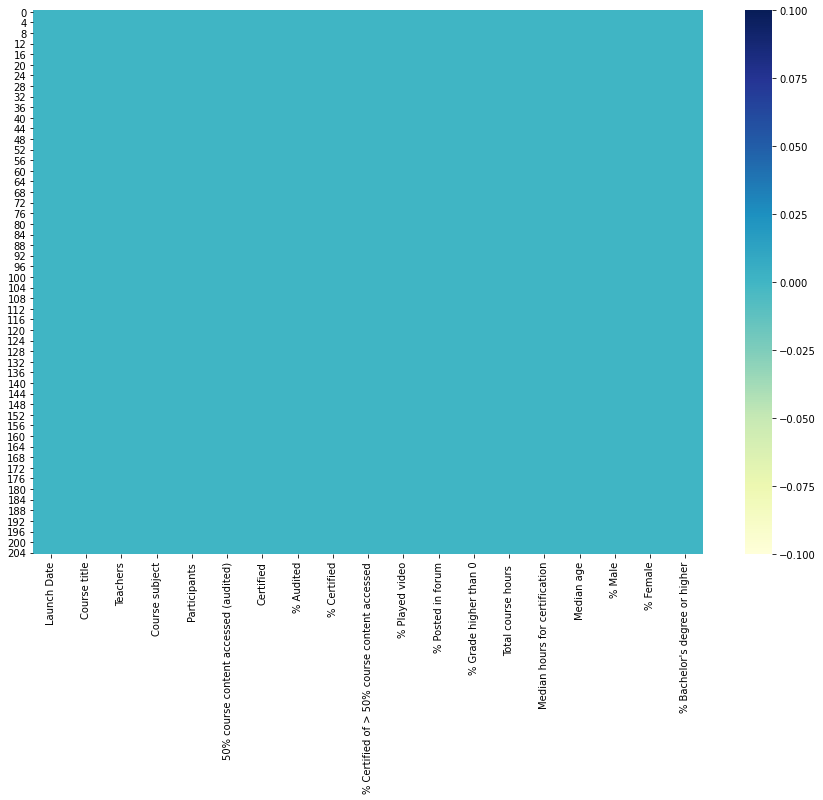

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df_course.isnull(),cmap="YlGnBu")

## Визуализация данных

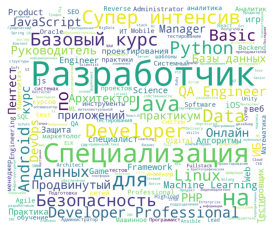

In [13]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(" ".join(df_course['Course title']))


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

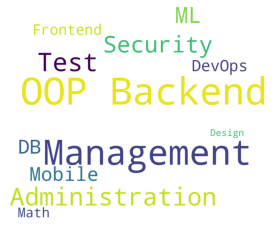

In [14]:
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(" ".join(df_course['Course subject']))


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [15]:
df_course=df_course.drop(['% Certified','Course title','% Grade higher than 0'],axis=1)
df_course

,Launch Date,Teachers,Course subject,Participants,50% course content accessed (audited),Certified,% Audited,% Certified of > 50% course content accessed,% Played video,% Posted in forum,Total course hours,Median hours for certification,Median age,% Male,% Female,% Bachelor's degree or higher
0,11/17/2018,Стрекалов Павел,"OOP, Backend",36105,5431,3003,15.04,54.98,83.20,8.17,418.94,64.45,26.0,88.28,11.72,60.68
1,12/25/2019,Стрекалов Павел,Mobile,62709,8949,5783,14.27,64.05,89.14,14.38,884.04,78.53,28.0,83.50,16.50,63.04
2,6/25/2019,Чибриков Виталий,"OOP, Backend",16663,2855,2082,17.13,72.85,87.49,14.42,227.55,61.28,27.0,70.32,29.68,58.76
3,3/27/2020,Чибриков Виталий,"OOP, Backend",129400,12888,1439,9.96,11.11,0.00,0.00,220.90,0.00,28.0,80.02,19.98,58.78
4,10/18/2019,Петрелевич Сергей,"OOP, Backend",52521,10729,5058,20.44,47.12,77.45,15.98,804.41,76.10,32.0,56.78,43.22,88.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,11/11/2019,Митруков Илья,Management,2860,920,333,32.17,36.20,63.64,6.78,47.23,77.55,29.0,59.10,40.90,76.33
201,6/6/2017,Кулиничев Алексей,"OOP, Backend",948,246,65,25.95,26.42,74.26,8.44,4.94,20.87,27.0,66.45,33.55,73.56
202,5/6/2018,Саблин Игорь,Management,1381,257,145,18.61,46.30,72.56,9.12,3.66,8.38,26.0,60.80,39.20,68.16
203,1/6/2019,Андреев Павел,DB,385,199,67,51.69,33.67,72.73,18.70,2.03,12.05,31.0,60.84,39.16,79.67


<AxesSubplot:>

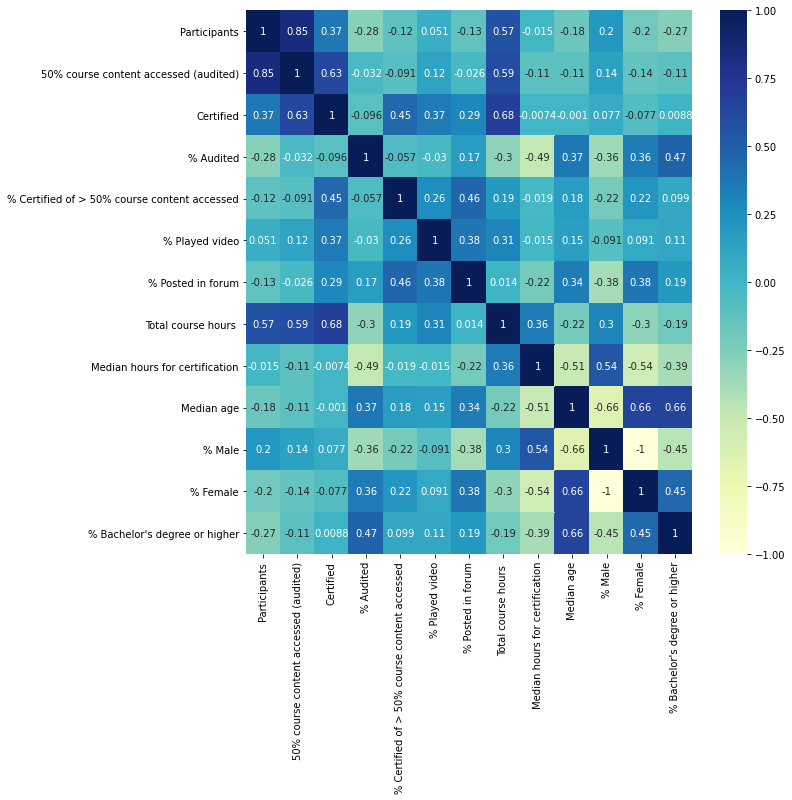

In [16]:
figure= plt.figure(figsize=(10,10))
sns.heatmap(df_course.corr(), annot=True,cmap="YlGnBu")

<AxesSubplot:xlabel='Course subject', ylabel='% Certified of > 50% course content accessed'>

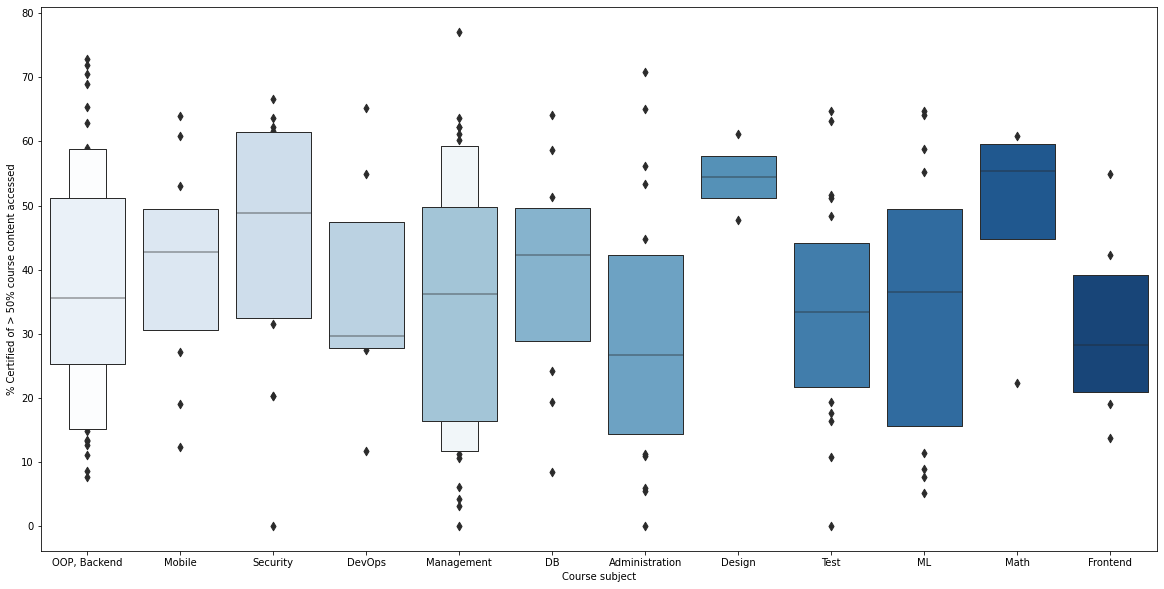

In [17]:
figure= plt.figure(figsize=(20,10))
sns.boxenplot(x='Course subject',y='% Certified of > 50% course content accessed',data=df_course,palette="Blues")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Participants', ylabel='Course subject'>

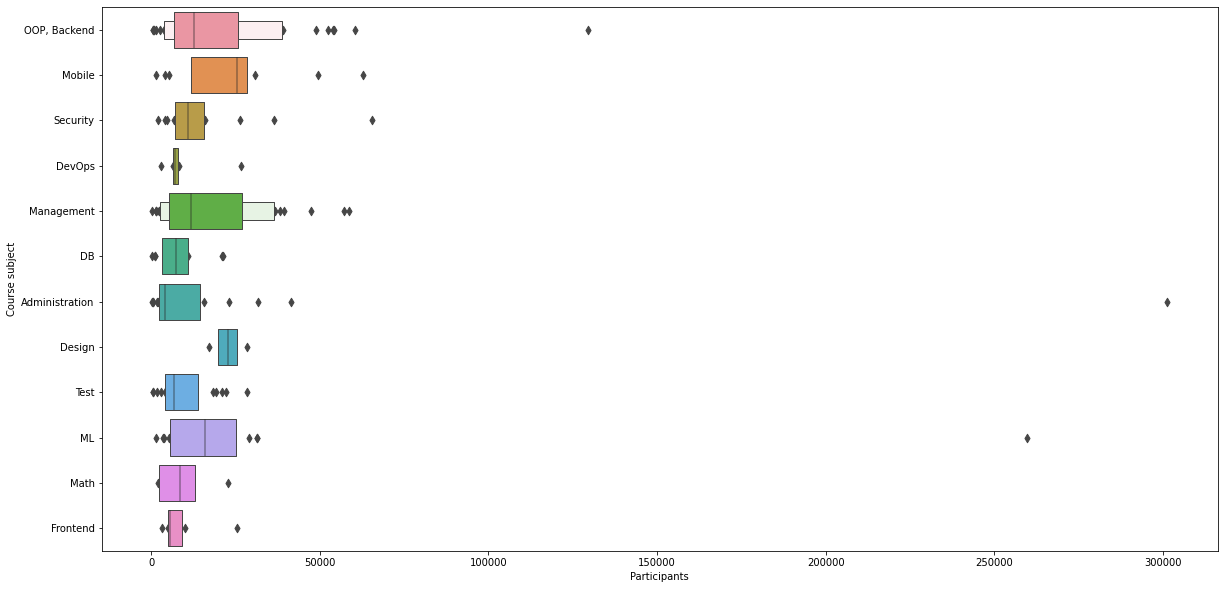

In [18]:
figure= plt.figure(figsize=(20,10))
sns.boxenplot('Participants','Course subject',data=df_course)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

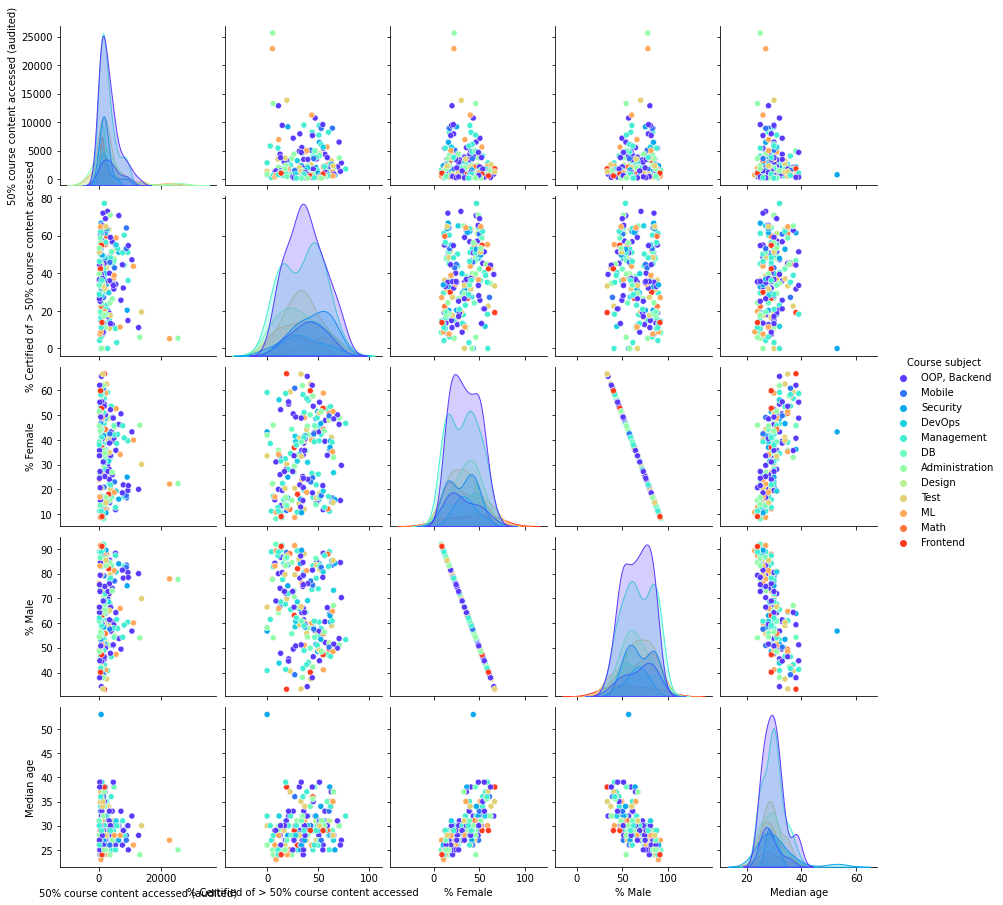

In [19]:
df_pairplot_cols=df_course[['Course subject','50% course content accessed (audited)','% Certified of > 50% course content accessed','% Female','% Male','Median age']]
plt.figure(figsize=(20,20))
sns.pairplot(df_pairplot_cols,hue='Course subject',palette='rainbow')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


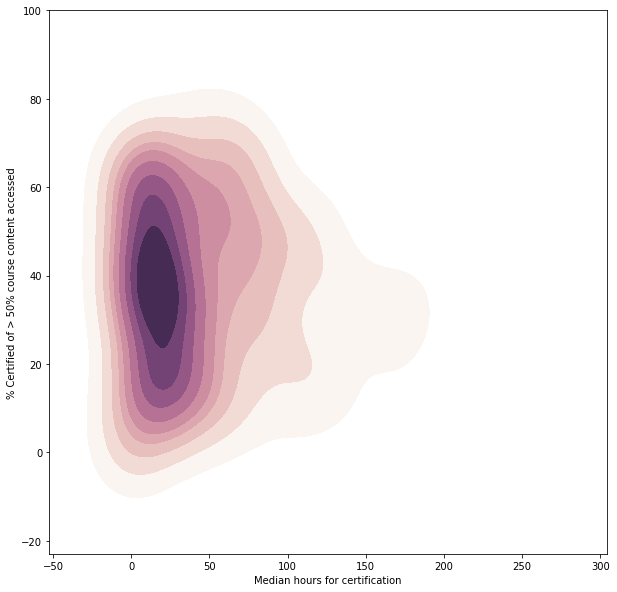

In [20]:
x= df_course['Median hours for certification']
y= df_course['% Certified of > 50% course content accessed']
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.figure(figsize=(10,10))
sns.kdeplot(x, y, cmap=cmap, shade=True);

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


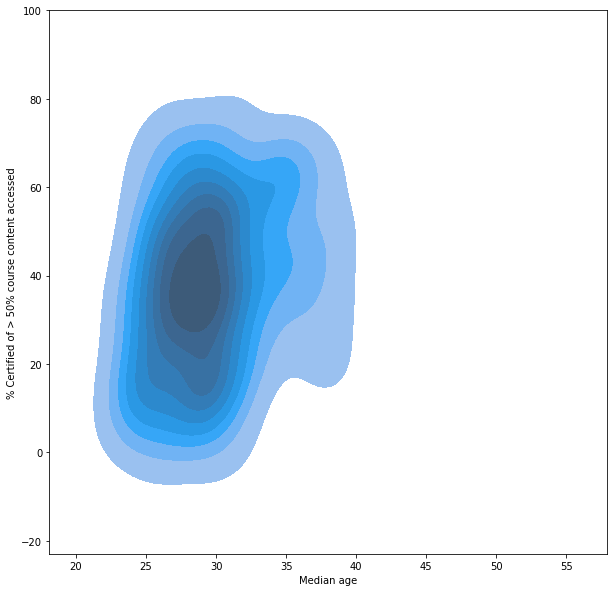

In [21]:
x= df_course['Median age']
y= df_course['% Certified of > 50% course content accessed']
plt.figure(figsize=(10,10))
sns.kdeplot(x, y, shade=True);

# Подготовка данных:
## удаление ненужных столбцов

In [22]:
df_course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Launch Date                                   205 non-null    object 
 1   Teachers                                      205 non-null    object 
 2   Course subject                                205 non-null    object 
 3   Participants                                  205 non-null    int64  
 4   50% course content accessed (audited)         205 non-null    int64  
 5   Certified                                     205 non-null    int64  
 6   % Audited                                     205 non-null    float64
 7   % Certified of > 50% course content accessed  205 non-null    float64
 8   % Played video                                205 non-null    float64
 9   % Posted in forum                             205 non-null    flo

In [23]:
df_XGB = df_course.drop(['Certified','50% course content accessed (audited)','Teachers','Launch Date','% Played video'],axis=1)

In [24]:
df_XGB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Course subject                                205 non-null    object 
 1   Participants                                  205 non-null    int64  
 2   % Audited                                     205 non-null    float64
 3   % Certified of > 50% course content accessed  205 non-null    float64
 4   % Posted in forum                             205 non-null    float64
 5   Total course hours                            205 non-null    float64
 6   Median hours for certification                205 non-null    float64
 7   Median age                                    205 non-null    float64
 8   % Male                                        205 non-null    float64
 9   % Female                                      205 non-null    flo

### Преобразование категориальных переменных в серии нулей и единиц, что значительно упрощает их количественное определение и сравнение.

In [25]:

CourseSubject = pd.get_dummies(df_XGB['Course subject'],drop_first=True)
df_XGB.drop(['Course subject'],axis=1,inplace=True)
df_XGB = pd.concat([df_XGB,CourseSubject],axis=1)


In [26]:
df_XGB

,Participants,% Audited,% Certified of > 50% course content accessed,% Posted in forum,Total course hours,Median hours for certification,Median age,% Male,% Female,% Bachelor's degree or higher,...,Design,DevOps,Frontend,ML,Management,Math,Mobile,"OOP, Backend",Security,Test
0,36105,15.04,54.98,8.17,418.94,64.45,26.0,88.28,11.72,60.68,...,0,0,0,0,0,0,0,1,0,0
1,62709,14.27,64.05,14.38,884.04,78.53,28.0,83.50,16.50,63.04,...,0,0,0,0,0,0,1,0,0,0
2,16663,17.13,72.85,14.42,227.55,61.28,27.0,70.32,29.68,58.76,...,0,0,0,0,0,0,0,1,0,0
3,129400,9.96,11.11,0.00,220.90,0.00,28.0,80.02,19.98,58.78,...,0,0,0,0,0,0,0,1,0,0
4,52521,20.44,47.12,15.98,804.41,76.10,32.0,56.78,43.22,88.33,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2860,32.17,36.20,6.78,47.23,77.55,29.0,59.10,40.90,76.33,...,0,0,0,0,1,0,0,0,0,0
201,948,25.95,26.42,8.44,4.94,20.87,27.0,66.45,33.55,73.56,...,0,0,0,0,0,0,0,1,0,0
202,1381,18.61,46.30,9.12,3.66,8.38,26.0,60.80,39.20,68.16,...,0,0,0,0,1,0,0,0,0,0
203,385,51.69,33.67,18.70,2.03,12.05,31.0,60.84,39.16,79.67,...,0,0,0,0,0,0,0,0,0,0


## Проверка на нулевые значения:

<AxesSubplot:>

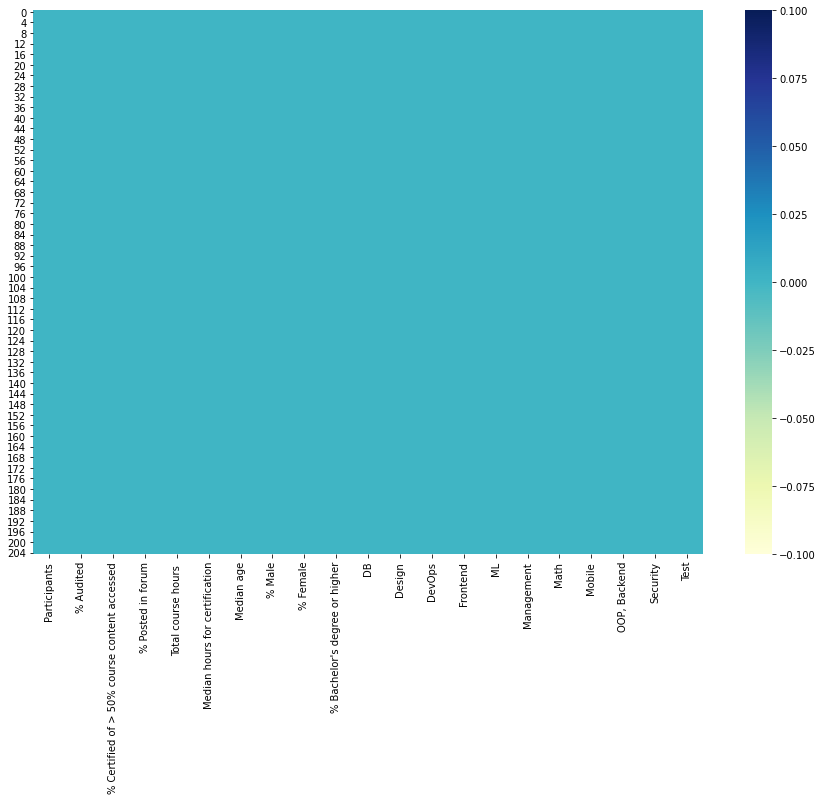

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df_XGB.isnull(),cmap="YlGnBu")

# XGBOOST


## Разделение на обучающую и тестовую выборки

In [28]:
from sklearn.model_selection import train_test_split
x= df_XGB
y=df_XGB['% Certified of > 50% course content accessed']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=109)

In [29]:
import xgboost as xgb
train= xgb.DMatrix(x_train,label=y_train)
test = xgb.DMatrix(x_test, label= y_test)

### XGBoost гиперпараметры
#### learning_rate: уменьшение размера шага, используемое для предотвращения переобучения. Диапазон [0,1]
#### max_depth: определяет, насколько глубоко каждое дерево может расти во время любого раунда повышения.
#### subsample: процент использованных образцов на дерево. Низкое значение может привести к неполному оснащению.
#### colsample_bytree: процент функций, используемых в дереве. Высокое значение может привести к переобучению.
#### n_estimators: количество деревьев, которые вы хотите построить.
#### objective: определяет функцию потерь, которая будет использоваться, например, reg: линейная для задач регрессии, reg: логистика для задач классификации с единственным решением, двоичная: логистика для задач классификации с вероятностью.
XGBoost также поддерживает параметры регуляризации, чтобы наказывать модели по мере их усложнения и сводить их к простым (экономным) моделям.
#### gamma: контролирует, будет ли данный узел разделен на основе ожидаемого сокращения потерь после разделения. Чем выше значение, тем меньше расщеплений. 
#### alpha: L1 регуляризация весов листьев. Большое значение ведет к большей регуляризации.
#### lambda: L2 регуляризация весов листьев и более плавная, чем регуляризация L1.


In [30]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.5, learning_rate = 0.2,
                max_depth = 7, alpha = 10, n_estimators = 75)

In [31]:
xg_reg.fit(x_train,y_train)
preds = xg_reg.predict(x_test)


[19:56:57] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:56:57] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


## Ошибка

In [32]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 6.109611


## ______________________________________________________________________________________

## Визуализация деревьев

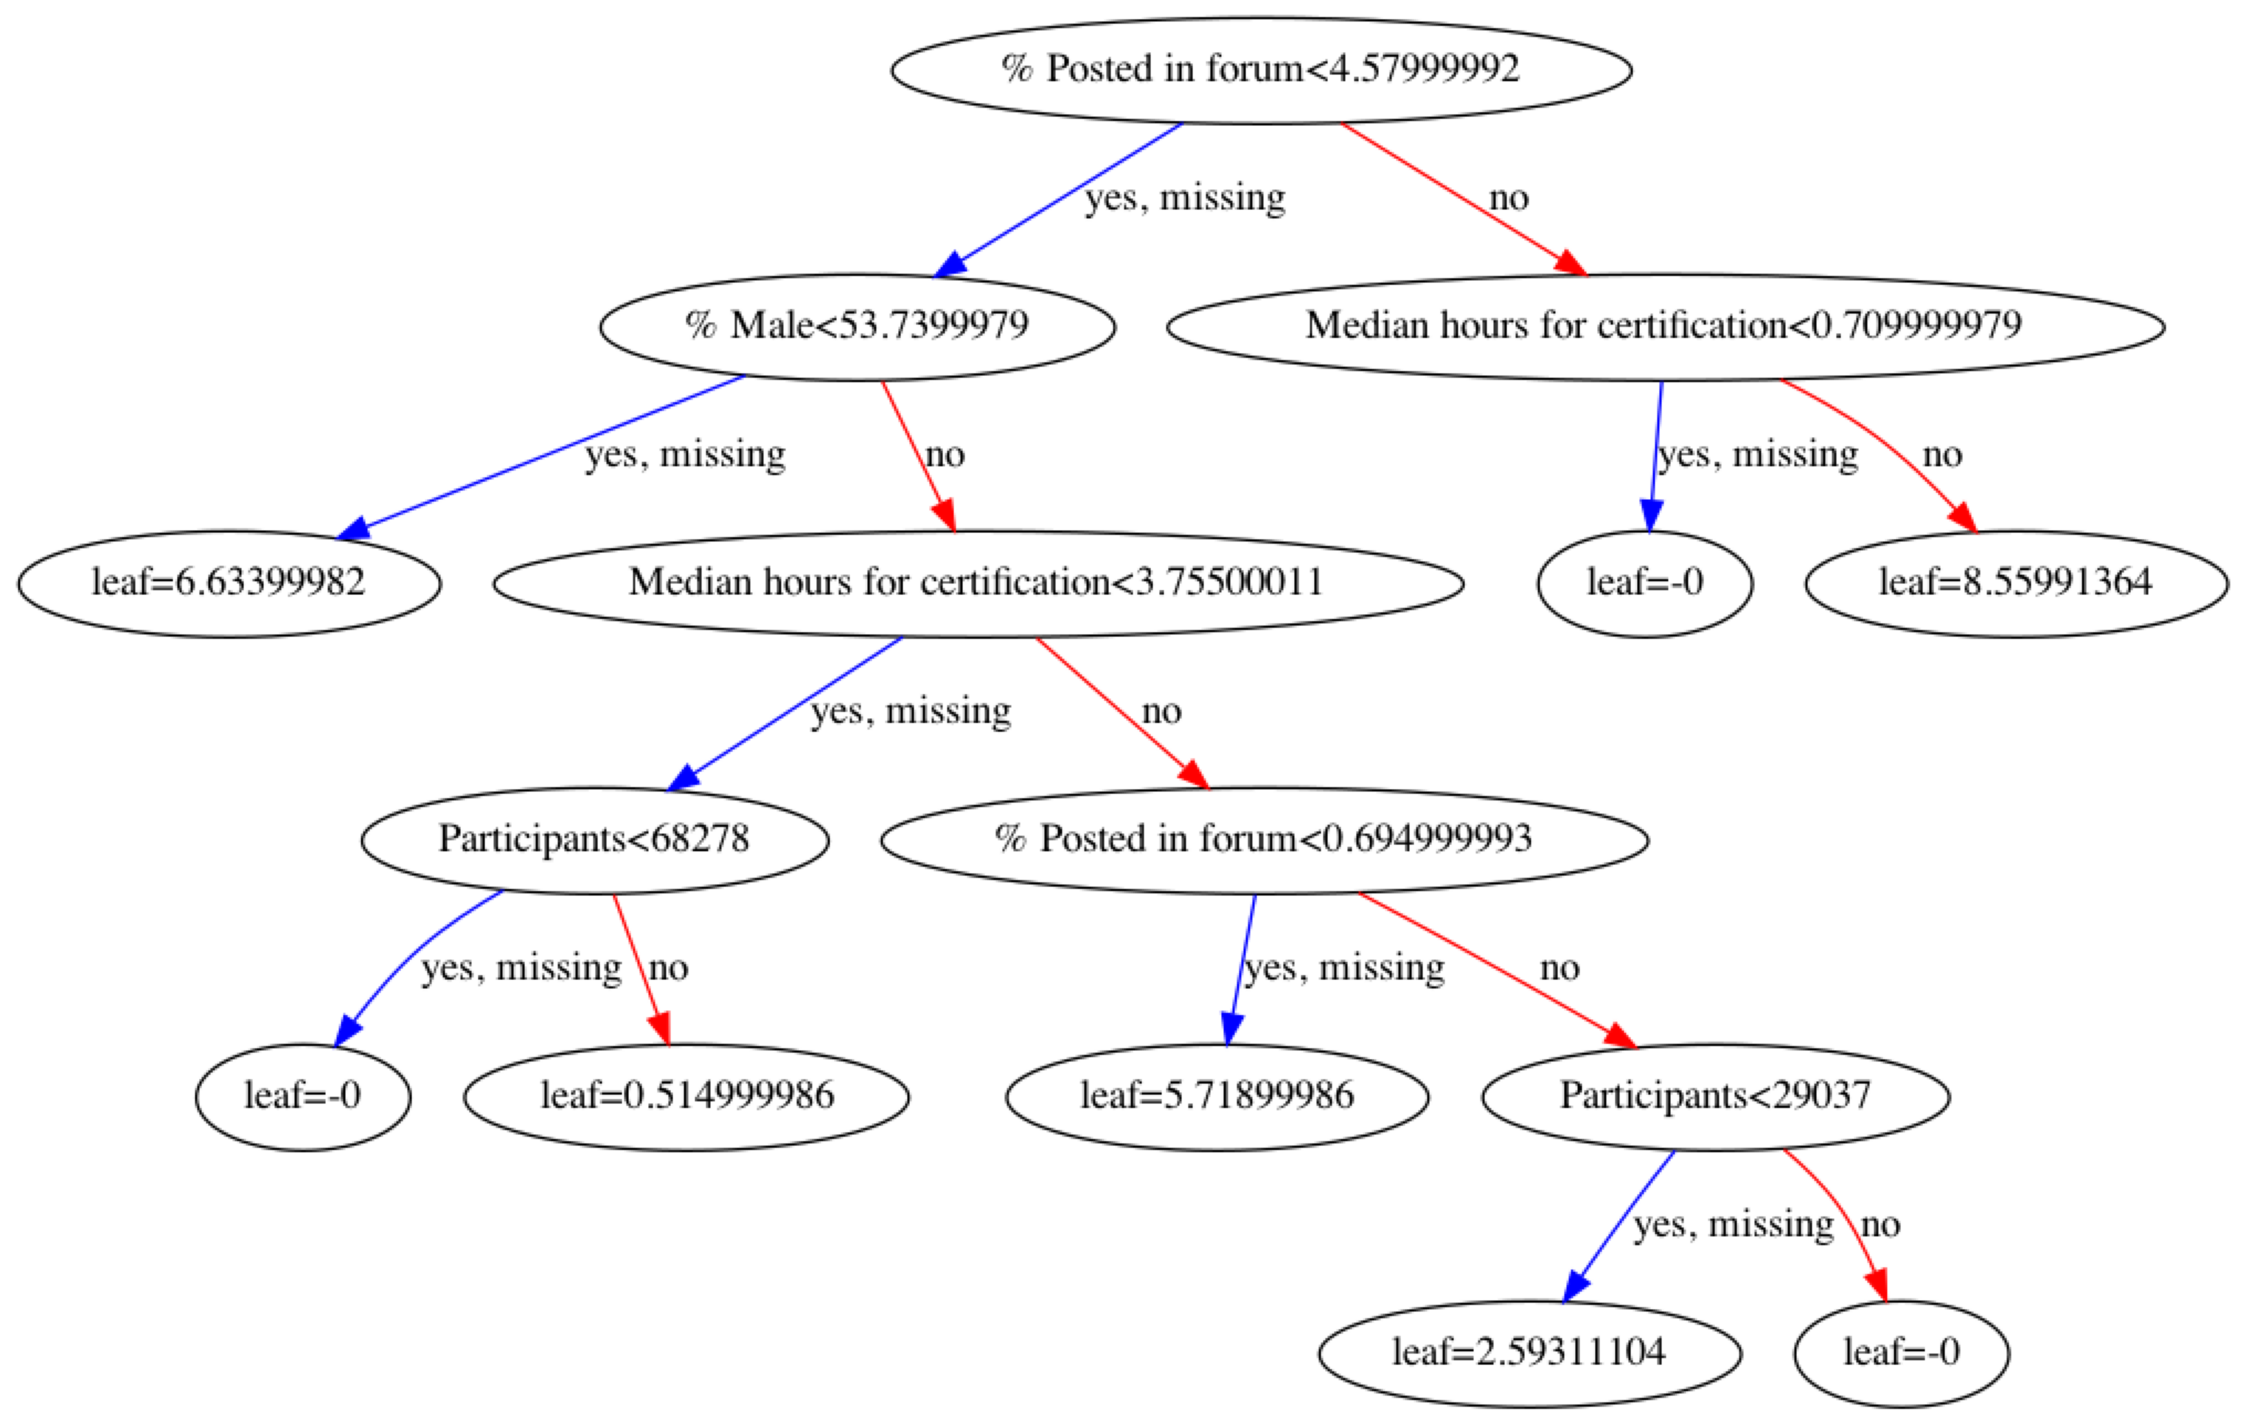

In [34]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [80, 60]
plt.show()

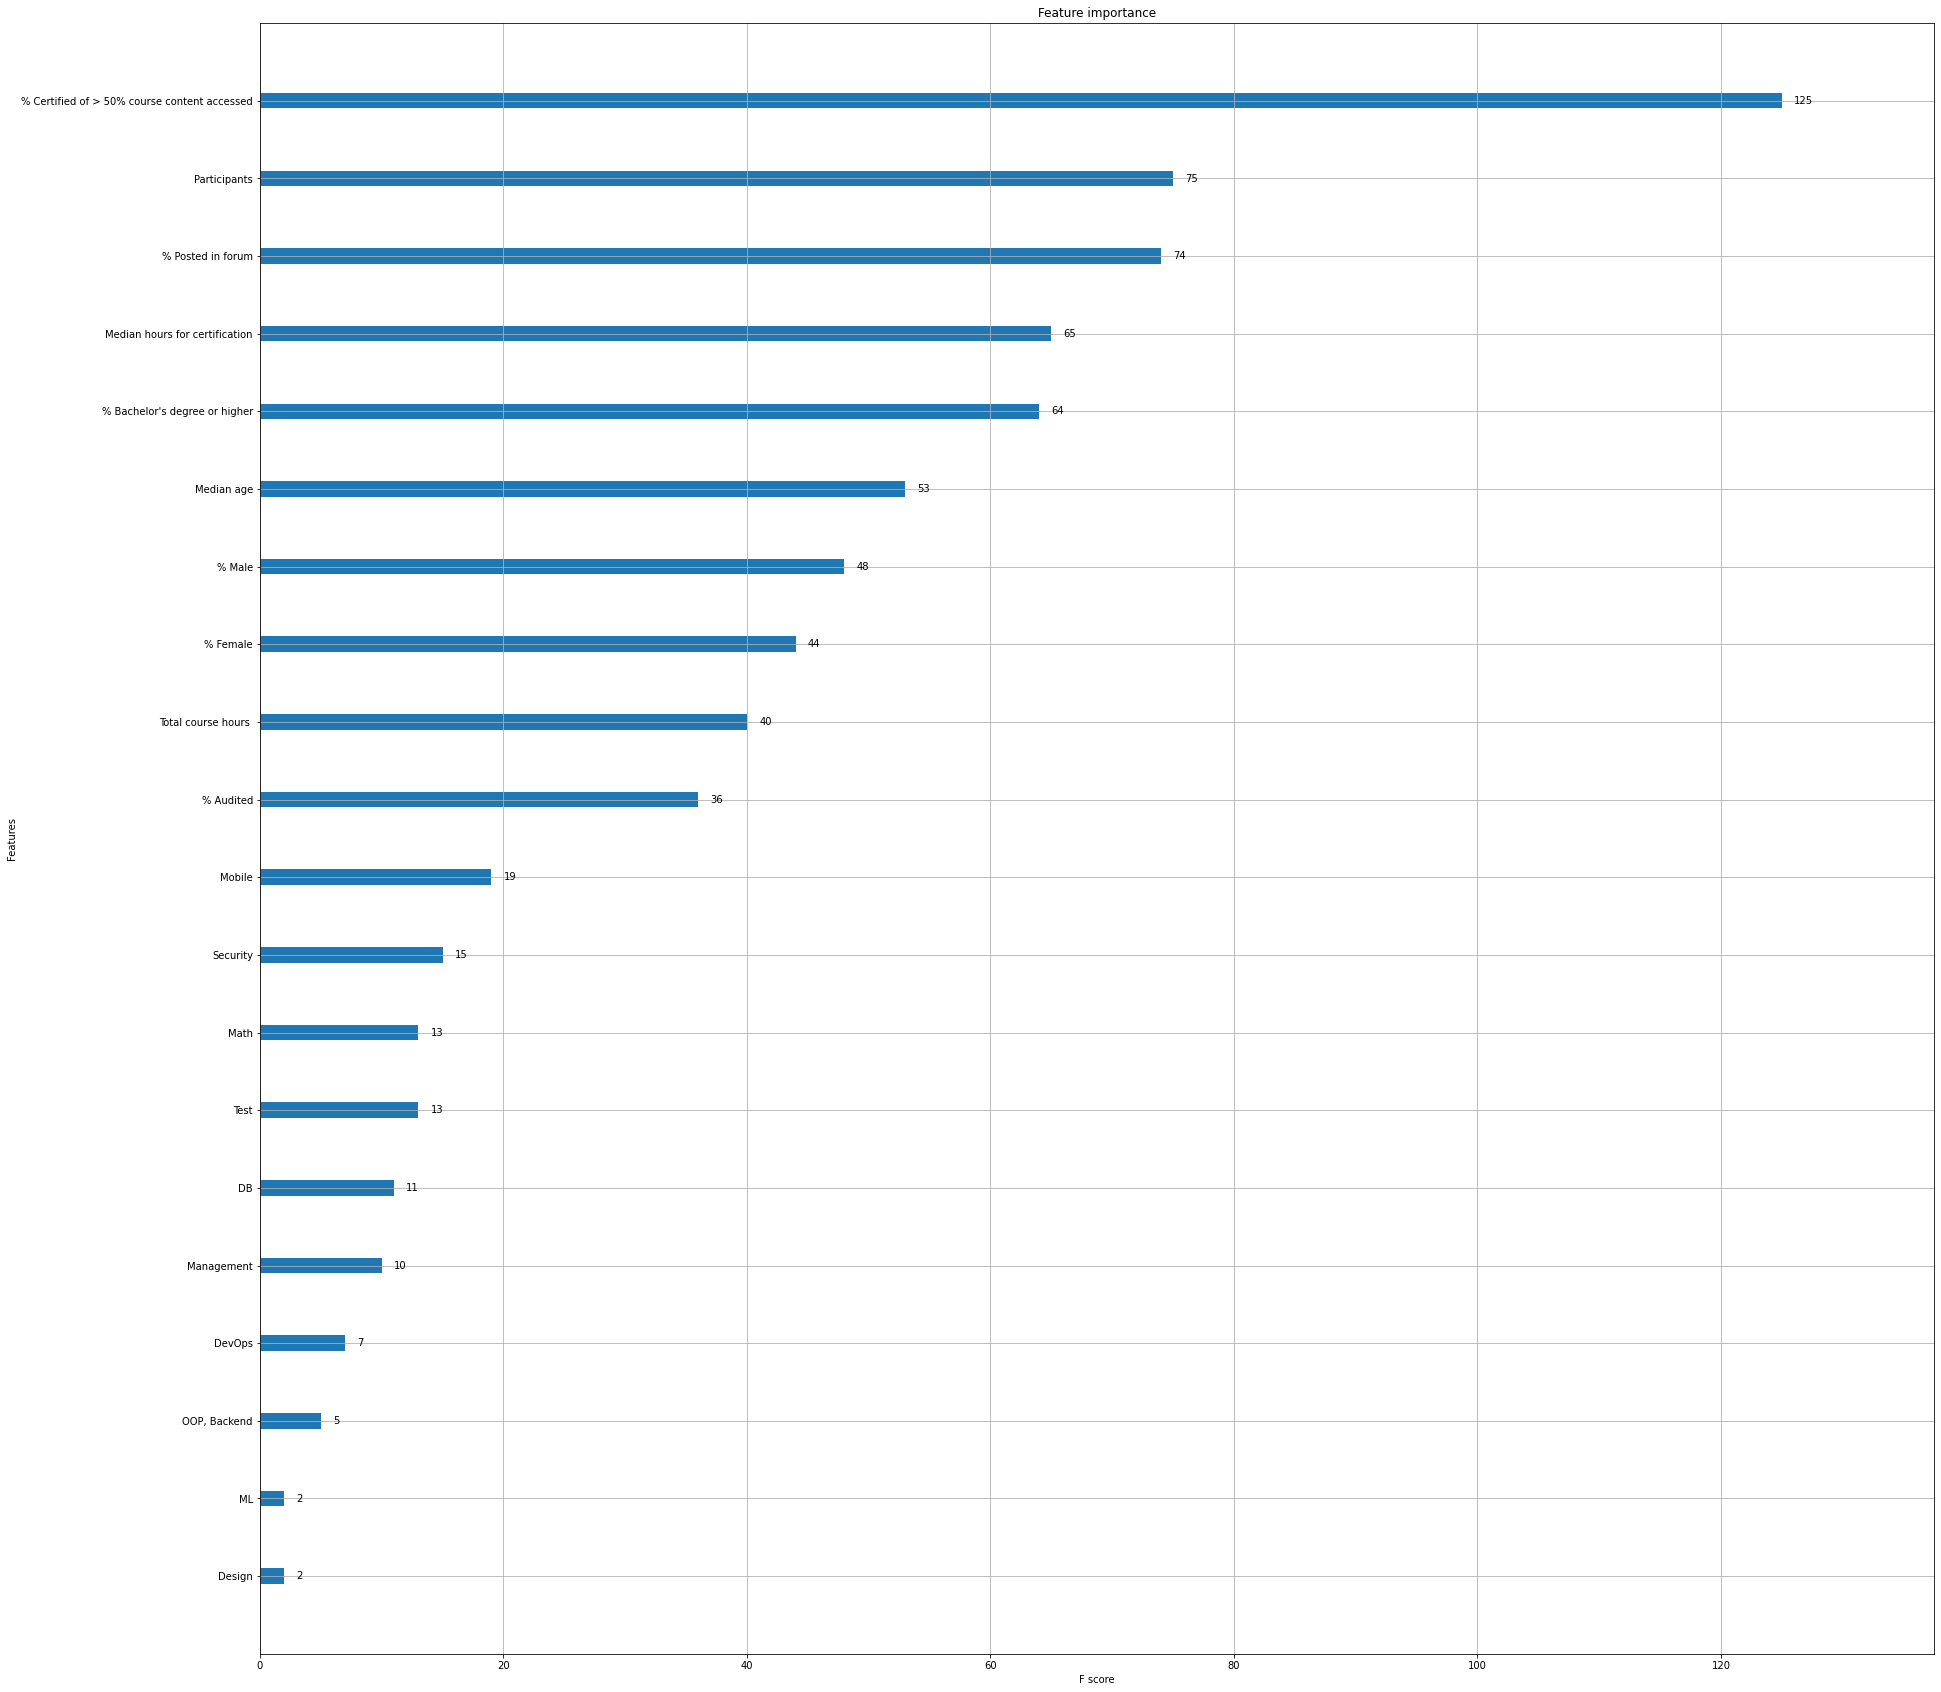

In [36]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [15,15]
plt.show()